In [35]:
from sklearn import datasets
import numpy as np

In [36]:
dataset=datasets.load_breast_cancer()

In [37]:
feature=dataset.data
targets=dataset.target

In [38]:
feature.shape,np.unique(targets)

((569, 30), array([0, 1]))

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(feature,targets,test_size=0.2,random_state=2)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
knn.score(x_test,y_test)

0.9912280701754386

In [46]:
# finding best value of k 
lst=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    lst.append(knn.score(x_test,y_test))

In [47]:
import matplotlib.pyplot as plt

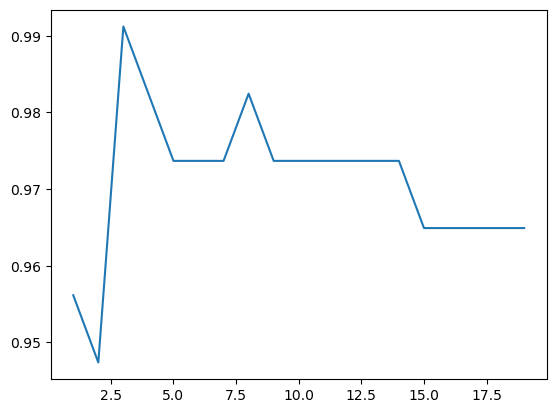

In [48]:
plt.plot(range(1,20),lst)

In [49]:
# so from graph best accuracy in k= 3

In [50]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

In [62]:
pca=PCA(n_components=2)
decomposed_data=pca.fit_transform(x_train)

In [63]:
# froming mashgrid of n data points
feature_1, feature_2 = np.meshgrid(
    np.linspace(decomposed_data[:, 0].min(), decomposed_data[:, 0].max()),
    np.linspace(decomposed_data[:, 1].min(), decomposed_data[:, 1].max())
)

In [64]:
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

In [65]:
decomposed_data.shape

(455, 2)

In [66]:
y_train.shape

(455,)

In [67]:
knn2=KNeighborsClassifier(n_neighbors=3)
knn2.fit(decomposed_data,y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:

y_pred = np.reshape(knn2.predict(grid), feature_1.shape)

In [69]:
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)

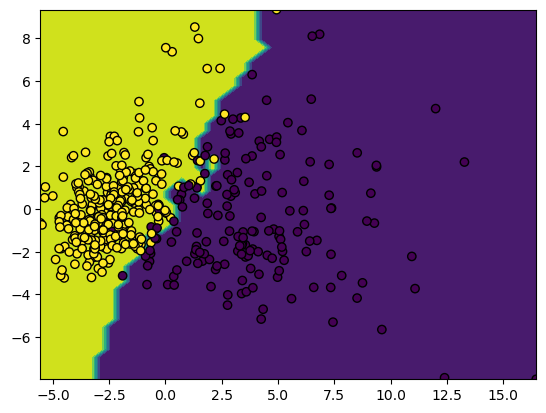

In [71]:
display.plot()
display.ax_.scatter(
    decomposed_data[:, 0], decomposed_data[:, 1], c=y_train, edgecolor="black"
)
